# Stationarity

In [34]:
from utilities.std_imports import *
import seaborn as sns
import scipy as sp
import random as rnd
import statsmodels as sm
import statsmodels.api as sa
from statsmodels.tsa.stattools import adfuller
from time_series.stationarity.stationarity import *
plt.rcParams["figure.figsize"] = (12,6)

Stationary time series

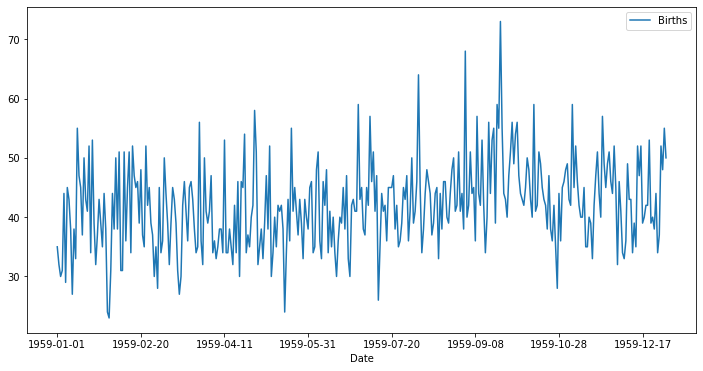

In [79]:
fb = pd.read_csv('D:/data/csv/female_births.csv', header=0, index_col=0)
fb.plot();

Non-stationary time series

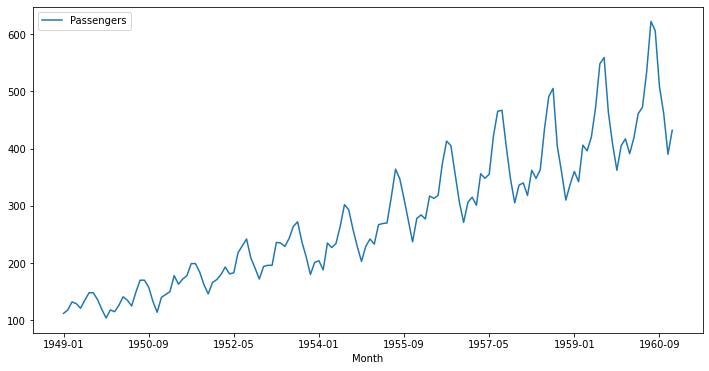

In [80]:
ap = pd.read_csv('D:/data/csv/airline_passengers.csv', header=0, index_col=0)
ap.plot();

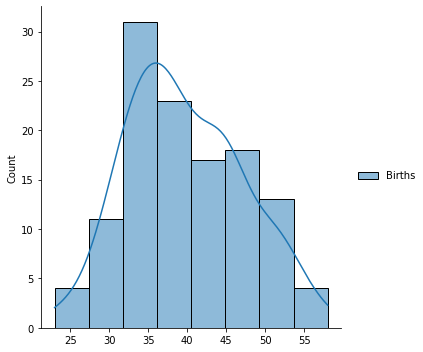

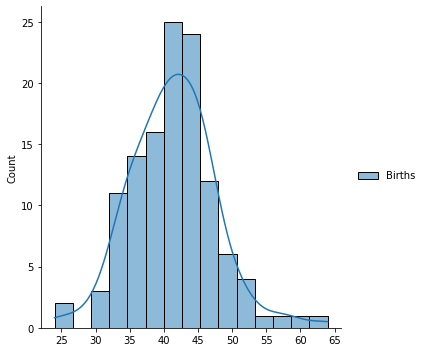

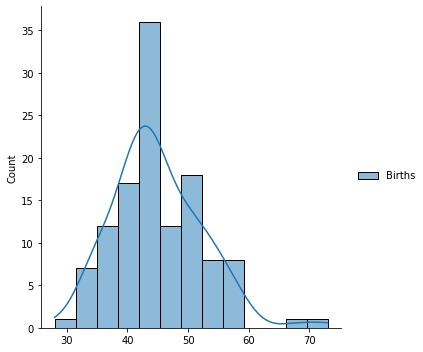

In [90]:
ts_dist(ts=fb, nsplit=3)

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

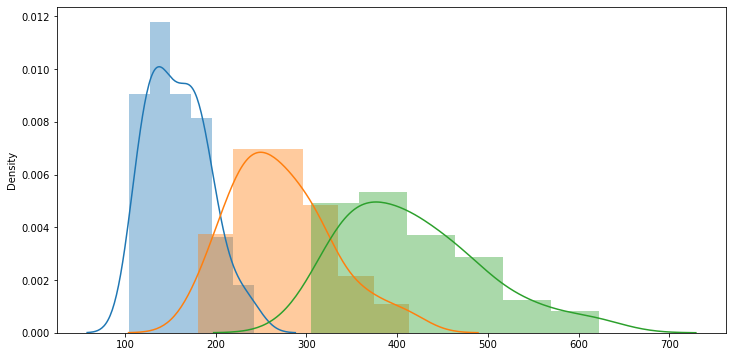

In [39]:
ts_dist(ts=ap, nsplit=3)

### Dickey-Fuller test
Ho: non stationarity (root unit present in AR model)

In [40]:
X = fb.values
res = adfuller(X)
print('p-value:\t' , res[1])

p-value:	 5.243412990149865e-05


### Autocorrelation

Not autocorrelated

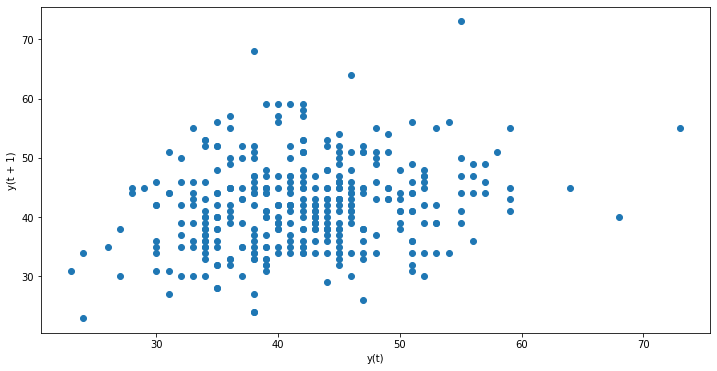

In [41]:
pd.plotting.lag_plot(fb, lag=1);

Autocorrelated

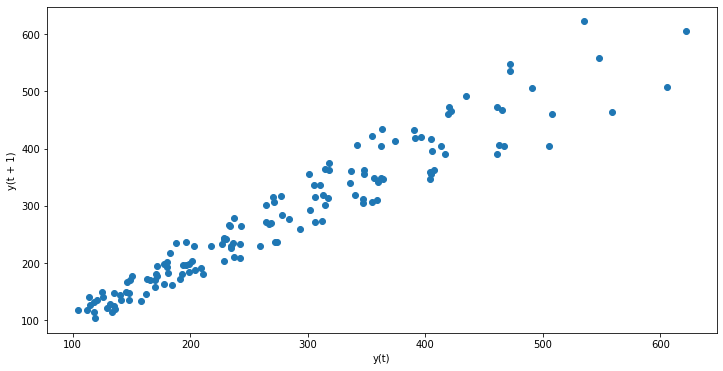

In [42]:
pd.plotting.lag_plot(ap, lag=1);

### White noise testing

Generate white noise time series

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

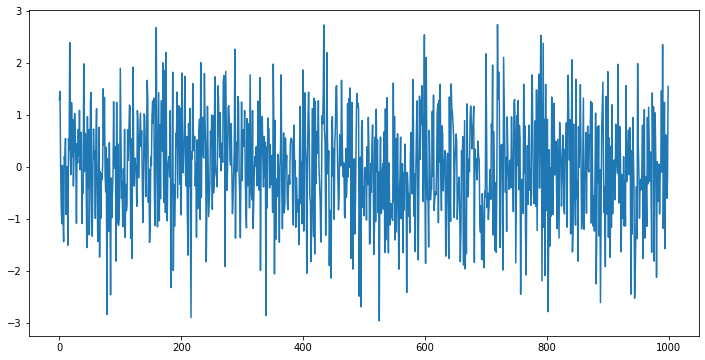

In [43]:
rnd.seed(1)
wn = [rnd.gauss(0.0, 1.0) for i in range(1000)]
wn = pd.Series(wn)
wn.plot()
wn.describe()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


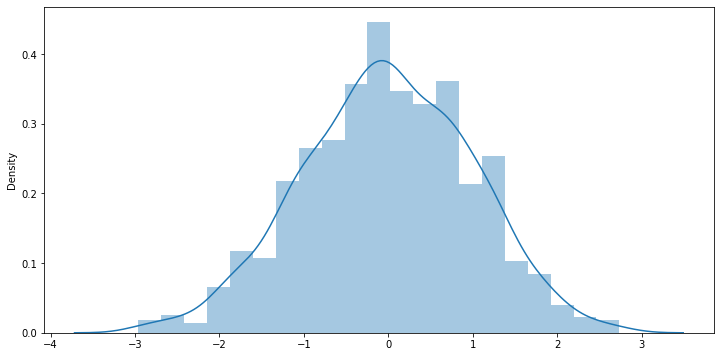

In [44]:
ts_dist(ts=wn, nsplit=1)

Autocorrelation

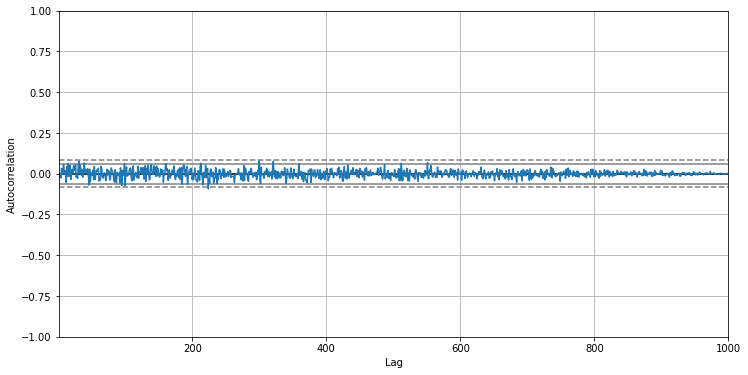

In [45]:
pd.plotting.autocorrelation_plot(wn);

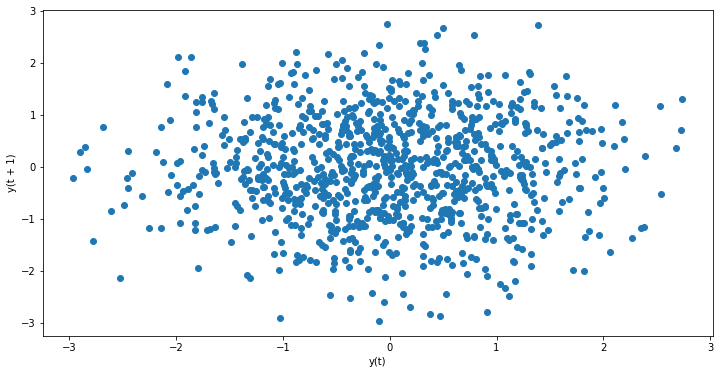

In [46]:
pd.plotting.lag_plot(wn, lag=1);

### Ljung-Box test 
Autocorrelation in residuals

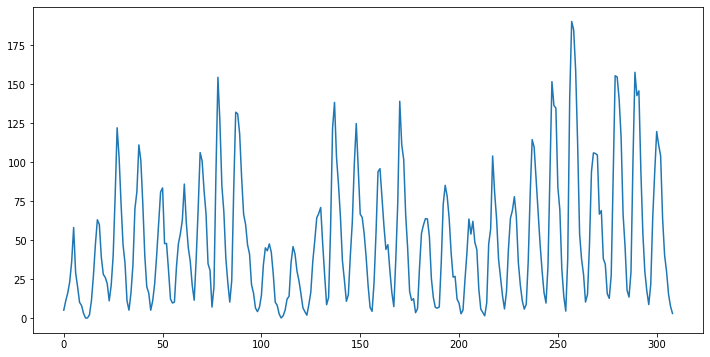

In [47]:
df = sa.datasets.sunspots.load_pandas().data
df = df.fillna(0)
ts = df['SUNACTIVITY']
ts.plot();

In [60]:
#res = sa.tsa.ARMA(ts, (1,1)).fit(disp=-1)
res = sm.tsa.arima.model.ARIMA(ts).fit()
sa.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,627.382673,2.381979e-128


In [61]:
#res = sa.tsa.ARMA(wn, (1,1)).fit(disp=-1)
res = sm.tsa.arima.model.ARIMA(wn).fit()
sa.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.723556,0.837929


In [65]:
#res = sa.tsa.ARMA(ap, (1,1)).fit(disp=-1)
res = sm.tsa.arima.model.ARIMA(ap).fit()
sa.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
10,857.068639,1.100789e-177


In [66]:
#res = sa.tsa.ARMA(fb, (1,1)).fit(disp=-1)
res = sm.tsa.arima.model.ARIMA(fb).fit()
sa.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
10,63.880949,6.631796e-10


### Normality tests

#### D'Agostino 
Tests null hypothesis that a sample comes from a normal distribution

In [55]:
sp.stats.normaltest(wn)

NormaltestResult(statistic=3.1324702657749595, pvalue=0.20882992111364135)

#### Shapiro
Tests null hypothesis that a sample comes from a normal distribution

In [56]:
sp.stats.shapiro(wn)

(0.9979580044746399, 0.265500009059906)

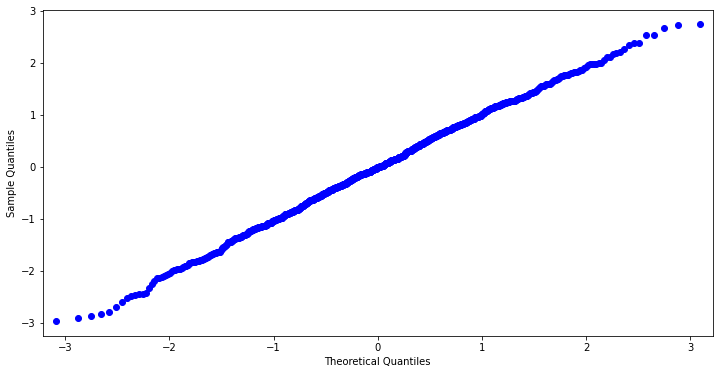

In [57]:
sa.qqplot(wn);

### Credits & Links

https://machinelearningmastery.com/time-series-data-stationary-python/